### Steps - 

#### Import Libraries and Modules :

 - Separate your Independent and Dependent data.
 - Split your data into train and test set.
 - Model Training.
 - Model Prediction.
 - Model Evaluation.

In [1]:
!pip install scikit-learn


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings
warnings.filterwarnings("ignore")

print("Set up complete")

Set up complete


In [26]:
data = pd.read_csv("Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### Prepraring Data for Linear Regression -

In [15]:
prefareastatus = pd.get_dummies(data["prefarea"],dtype = int,drop_first = True)
prefareastatus.head()

,yes
0,1
1,0
2,1
3,1
4,0


In [13]:
airconditioningstatus = pd.get_dummies(data["airconditioning"],dtype = int , drop_first = True)
airconditioningstatus.head()

,yes
0,1
1,1
2,0
3,1
4,1


In [14]:
mainroadstatus = pd.get_dummies(data["mainroad"],dtype = int , drop_first = True)
mainroadstatus.head()

,yes
0,1
1,1
2,1
3,1
4,1


In [16]:
guestroomstatus = pd.get_dummies(data["guestroom"],dtype = int , drop_first = True)
guestroomstatus.head()

,yes
0,0
1,0
2,0
3,0
4,1


In [17]:
basementstatus = pd.get_dummies(data["basement"],dtype = int , drop_first = True)
basementstatus.head()

,yes
0,0
1,0
2,1
3,1
4,1


In [20]:
hotwaterheatingstatus = pd.get_dummies(data["hotwaterheating"],dtype = int , drop_first = True)
hotwaterheatingstatus.head()

,yes
0,0
1,0
2,0
3,0
4,0


In [18]:
furnished = pd.get_dummies(data["furnishingstatus"],dtype = int , drop_first = True)
furnished.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [12]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [27]:
Data = pd.concat([data,mainroadstatus,guestroomstatus,basementstatus,hotwaterheatingstatus,airconditioningstatus,prefareastatus,furnished],axis = 1)
Data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,prefarea,furnishingstatus,yes,yes,yes,yes,yes,yes,semi-furnished,unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,...,yes,furnished,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,...,no,furnished,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,...,yes,semi-furnished,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,...,yes,furnished,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,...,no,furnished,1,1,1,0,1,0,0,0


In [40]:
Data.head()

,price,area,bedrooms,bathrooms,stories,parking,semi-furnished,unfurnished
0,13300000,7420,4,2,3,2,0,0
1,12250000,8960,4,4,4,3,0,0
2,12250000,9960,3,2,2,2,1,0
3,12215000,7500,4,2,2,3,0,0
4,11410000,7420,4,1,2,2,0,0


In [42]:
Data.shape

(545, 8)

#### Separating Independent and Dependent Data -

In [43]:
Data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [44]:
X = Data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'semi-furnished', 'unfurnished']]

y = Data["price"]

In [45]:
X

,area,bedrooms,bathrooms,stories,parking,semi-furnished,unfurnished
0,7420,4,2,3,2,0,0
1,8960,4,4,4,3,0,0
2,9960,3,2,2,2,1,0
3,7500,4,2,2,3,0,0
4,7420,4,1,2,2,0,0
...,...,...,...,...,...,...,...
540,3000,2,1,1,2,0,1
541,2400,3,1,1,0,1,0
542,3620,2,1,1,0,0,1
543,2910,3,1,1,0,0,0


In [46]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

#### spliting data into train and test set -

In [56]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2,shuffle = True , random_state = 42)

In [57]:
X_train

,area,bedrooms,bathrooms,stories,parking,semi-furnished,unfurnished
46,6000,3,2,4,1,0,0
93,7200,3,2,1,3,1,0
335,3816,2,1,1,2,0,0
412,2610,3,1,2,0,0,1
471,3750,3,1,2,0,0,1
...,...,...,...,...,...,...,...
71,6000,4,2,4,0,0,1
106,5450,4,2,1,0,1,0
270,4500,3,2,3,1,0,0
435,4040,2,1,1,0,0,1


In [58]:
X_test

,area,bedrooms,bathrooms,stories,parking,semi-furnished,unfurnished
316,5900,4,2,2,1,0,1
77,6500,3,2,3,0,0,0
360,4040,2,1,1,0,1,0
90,5000,3,1,2,0,1,0
493,3960,3,1,1,0,0,0
...,...,...,...,...,...,...,...
15,6000,4,1,2,2,1,0
357,6930,4,1,2,1,0,0
39,6000,4,2,4,1,1,0
54,6000,3,2,2,1,1,0


In [59]:
y_train

46     7525000
93     6300000
335    3920000
412    3430000
471    3010000
        ...   
71     6755000
106    6160000
270    4340000
435    3290000
102    6195000
Name: price, Length: 436, dtype: int64

In [60]:
y_test

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64

In [61]:
X_train.shape , X_test.shape

((436, 7), (109, 7))

In [62]:
y_train.shape , y_test.shape

((436,), (109,))

#### MODEL TRAINING (Linear Regression) -

In [63]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [64]:
X.shape

(545, 7)

In [66]:
X.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'semi-furnished',
       'unfurnished'],
      dtype='object')

In [70]:
model.coef_

array([ 3.00828635e+02,  1.44537714e+05,  1.15490051e+06,  4.64070182e+05,
        2.94519572e+05, -2.80890184e+05, -6.86630267e+05])

In [69]:
pd.DataFrame(model.coef_ , index = X.columns , columns = ["Coefficient/Slops"])

,Coefficient/Slops
area,3.008286e+02
bedrooms,1.445377e+05
bathrooms,1.154901e+06
stories,4.640702e+05
parking,2.945196e+05
semi-furnished,-2.808902e+05
unfurnished,-6.866303e+05


#### MODEL PREDICTION -

In [71]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [72]:
X_train[:3]

,area,bedrooms,bathrooms,stories,parking,semi-furnished,unfurnished
46,6000,3,2,4,1,0,0
93,7200,3,2,1,3,1,0
335,3816,2,1,1,2,0,0


In [73]:
y_train[:3]

46     7525000
93     6300000
335    3920000
Name: price, dtype: int64

In [76]:
y_test[:3]

316    4060000
77     6650000
360    3710000
Name: price, dtype: int64

##### Predicted Value -

In [74]:
y_pred_train[:3]

array([7273256.9417476 , 6550189.71945248, 4219118.00121045])

In [77]:
y_pred_test[:3]

array([5772941.1621756 , 6665081.50537605, 3416574.28708974])

#### MODEL EVALUATION - 

In [80]:
## For training data -

mean_squared_error(y_train,y_pred_train)

np.float64(1285357616524.0186)

In [81]:
np.sqrt(mean_squared_error(y_train,y_pred_train))

np.float64(1133736.131789059)

In [82]:
mean_absolute_error(y_train,y_pred_train)

np.float64(828875.2458730041)

In [83]:
r2_score(y_train,y_pred_train)

0.5831352422689122

In [90]:
# For training data -

def training_evaluation(actual,predicted):

    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    mae = mean_absolute_error(actual,predicted)
    r2  = r2_score(actual,predicted)

    print(f"MSE : {mse}")
    print(f"RMSE : {rmse}")
    print(f"MAE : {mae}")
    print(f"R2 : {r2}")


    plt.scatter(actual,predicted,color = "r" , label = "Actual Price")
    plt.plot([actual.min(),actual.max()],[actual.min(),actual.max()],color = "k" , lw = 2 , label = "Predicted Price")
    plt.title("Best fit line = Training Data")
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.legend()
    plt.show()

MSE : 1285357616524.0186
RMSE : 1133736.131789059
MAE : 828875.2458730041
R2 : 0.5831352422689122


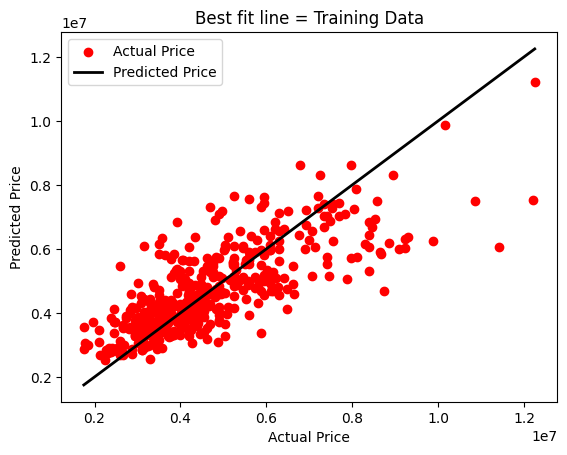

In [91]:
training_evaluation(y_train,y_pred_train)

In [98]:
## For Testing Data
def test_evaluation(actual,predicted):

    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    mae = mean_absolute_error(actual,predicted)
    r2  = r2_score(actual,predicted)

    print(f"MSE : {mse}")
    print(f"RMSE : {rmse}")
    print(f"MAE : {mae}")
    print(f"R2 : {r2}")


    plt.scatter(actual,predicted,color = "g" , label = "Actual Price")
    plt.plot([actual.min(),actual.max()],[actual.min(),actual.max()],color = "k" , lw = 2 , label = "Predicted Price")
    plt.title("Best fit line = Testing Data")
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.legend()
    plt.show()

MSE : 2229169358205.0586
RMSE : 1493040.306959279
MAE : 1112059.1858898462
R2 : 0.5589794483892094


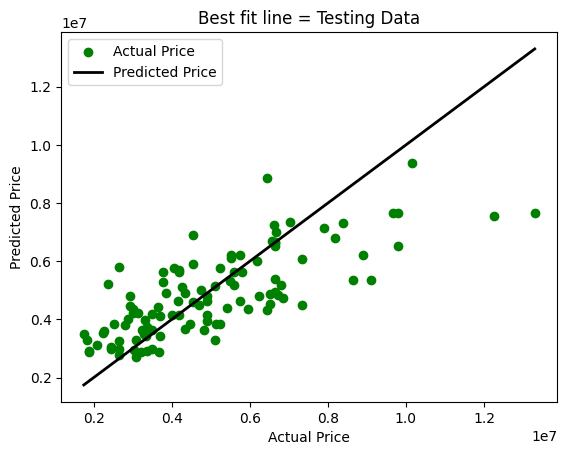

In [99]:
test_evaluation(y_test,y_pred_test)